The values for the model that best "fit" the data were: T_amb = 19 deg. C, Ua = 0.045 Watts/deg. C, and Cp = 8 joules/deg.C.


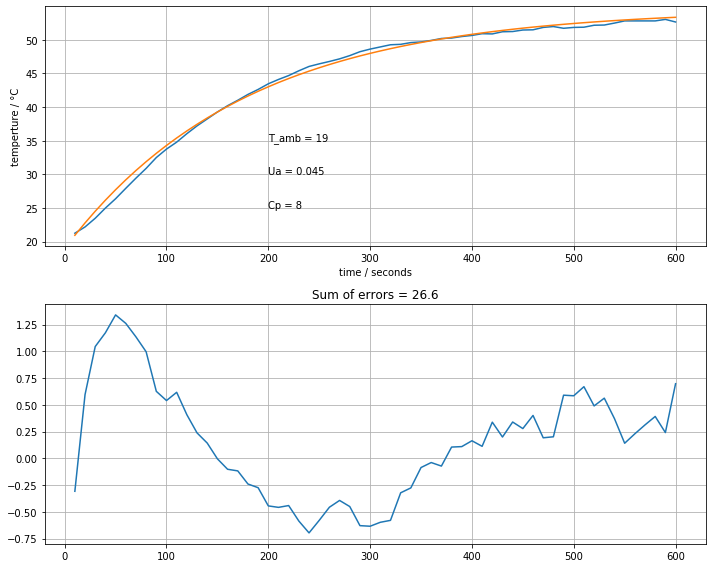

In [25]:
# Assignment 3 part 3

# Adding an additional adjustable parameter. Suppose Tamb is not measured.
# Create a new function called compare3 that compares prediction to experimental data

# The orange is the experimental data plot and the blue is the changing model plot

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_file = "data/Model_Data.csv"
data = pd.read_csv("https://jckantor.github.io/cbe30338-2021/" + data_file).set_index("Time")[1:]
t = data.index
T1 = data['T1'].values

# parameter values and units
alpha = 0.00016        # watts / (units P1 * percent U1)
P1 = 200               # P1 units
Ua = 0.045              # watts/deg C
Cp = 8                # joules/deg C
U1 = 50                # steady state value of u1 (percent)
T_amb = 19

def compare(T_amb, Ua, Cp):
    T1_dev_initial = 0
    T1_dev_ss = alpha*P1*U1/Ua
    T1_dev = T1_dev_ss + (T1_dev_initial - T1_dev_ss)*np.exp(-Ua*t/Cp)
    T1_model = T1_dev + T_amb
    
    fig, ax = plt.subplots(2, 1, figsize=(10,8))
    
    ax[0].plot(t, T1, t, T1_model)
    ax[0].set_xlabel('time / seconds')
    ax[0].set_ylabel('temperture / °C')
    ax[0].grid(True)

    ax[0].text(200, 30, f'Ua = {Ua}')
    ax[0].text(200, 25, f'Cp = {Cp}')
    ax[0].text(200, 35, f'T_amb = {T_amb}')
    
    ax[1].plot(t, T1_model - T1)
    ax[1].set_title(f'Sum of errors = {sum(abs(T1_model-T1)):0.1f}')
    ax[1].grid(True)
    
    plt.tight_layout()

compare(T_amb,Ua,Cp)

best_T_amb = 19 # deg. C
best_Ua = 0.045 # watts/deg. C
best_Cp = 8 # joules/deg. C

print('The values for the model that best "fit" the data were: T_amb =',best_T_amb,'deg. C, Ua =',best_Ua,'Watts/deg. C, and Cp =',best_Cp,'joules/deg.C.')

In [ ]:
# Were you able to reduce the structural error in the model? Discuss your result.

# I was able to reduce the structural error in the model from an overal error sum of 53.4 that we calculated in class using the
# first "compare" function to a value of 26.6 for my "compare3" function. The overall error value of 53.4 was for the model in
# which we only varied two parameters, Ua and Cp, to find the best "fit" for the experimental data. We iterated through several
# parameters in class and the best 'fit' we reached corresponded to the error of 53.4. However, by creating a function with 
# three parameters that could be varied in order to compare a model to the data, through trial and error of all three, it was
# easier to find a model that fit the data much more accurately, with the much more reduced sum of errors of 26.6. Therefore,
# we can conclude that with the ability to vary more parameters, we can improve fit of the data accurately using a model. 